In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 3.3 kB/s 
     |████████████████████████████████| 2.9 MB 36.4 MB/s 
     |████████████████████████████████| 3.0 MB 16.6 MB/s 
     |████████████████████████████████| 454 kB 33.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [ ]:
import os
import cv2
import random
import numpy as np


img_size_100p = 128 # Increase dataset size (untuk dipakai di Arsitektur ResNet50) 

path_train  = '/content/drive/MyDrive/Dataset Aksara Lampung/train'                           
path_test   = '/content/drive/MyDrive/Dataset Aksara Lampung/validation'                                                        
categories  = ['Ka', 'Ga', 'Nga', 'Pa', 'Ba', 'Ma', 'Ta', 'Da', 'Na', 'Ca', 'Ja', 'Nya','Ya', 'A', 'La', 'Ra', 'Sa', 'Wa', 'Ha', 'Gha']         

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Ambil label sebagai index (number)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_100p, img_size_100p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

# Shuffle Data Train (kalo enggak di shuffle, nanti data train ngurut berdasarkan labels)
random.seed(10) # 10 sebagai index shuffle, agar saat run ulang nanti hasil shuffle sama
random.shuffle(dataTrain)

In [ ]:
# X untuk Features & y untuk labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

#-1 di reshape hm... pokoknya biar numpy nya nentuin dimensi datanya deh yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_100p, img_size_100p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_100p, img_size_100p, 3)
y_test  = np.asarray(y_test)


print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (6975, 128, 128, 3)
y_train : (6975,)
X_test  : (1172, 128, 128, 3)
y_test  : (1172,)


In [ ]:
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)

# one hot encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)

Isi Array y_train : [ 8  7 11 ...  6  0  9]
Isi Array y_test  : [ 0  0  0 ... 19 19 19]

Isi Array y_train_encode :

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Isi Array y_test_encode :

 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
print("Isi Array X_train :\n\n", X_train[0]) # cuma buat ngabil dta contoh yg pertama ya ges yaaaa
print("\nIsi Array X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # pokoknya ubah iteger ke float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # ini buat jadiin range nya 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])


Isi Array X_train :

 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [250 250 250]
  [243 243 243]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]

Isi Array X_test  :

 [[[  5   5   5]
  [  6   6   6]
  [ 10  10  10]
  ...
  [127 127 127]
  [106 106 106]
  [130 130 130]]

 [[248 248 248]
  [245 245 245]
  [249 249 249]
  ...
  [250 250 250]
  [247 247 247]
  [225 225 225]]

 [[250 250 250]
  [254 254 254]
  [254 254 254]
  ...
  [250 250 250]
  [250 250 250]
  [231 231 231]]

 ...

 [[254 

In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (6975, 128, 128, 3)
y_train_encode   : (6975, 20)
X_test_norm      : (1172, 128, 128, 3)
y_test_encode    : (1172, 20)


94773248/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
__________________________

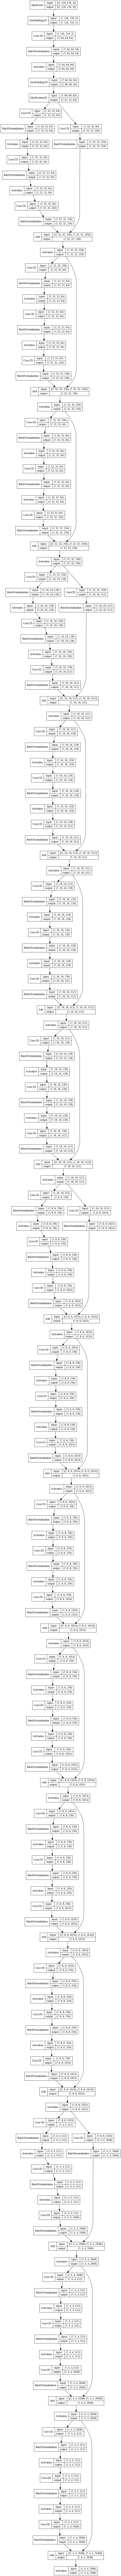

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = ResNet50(weights='imagenet', 
include_top=False, 
input_shape=(img_size_100p, img_size_100p, 3))


conv_base.trainable = False                                                                                   
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_14  (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                40980     
Total params: 23,628,692
Trainable params: 40,980
Non-trainable params: 23,587,712
_________________________________________________________________


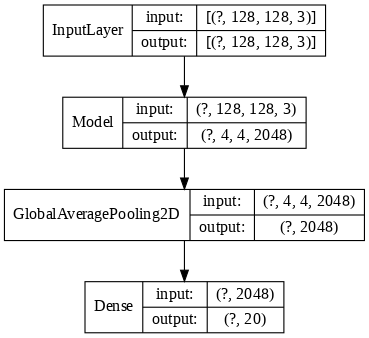

In [ ]:
from tensorflow.python.keras.backend import sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

def define_model_resnet50():
    model = Sequential()
    
    model.add(conv_base)                        
    model.add(GlobalAveragePooling2D())

    model.add(Dense(20, activation='softmax'))   
    
    # Compile Model
    opt = Adam(lr=0.001)                      
    model.compile(optimizer=opt, 
    loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_resnet50()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
os.mkdir("/content/simpan_model") # Buat folder untuk save model report (run 1x)

In [ ]:
%%time

import pandas as pd

epochs = 25       
batch_size = 64   

model = define_model_resnet50() 


history = model.fit(X_train_norm, 
y_train_encode, epochs=epochs, 
batch_size=batch_size, verbose=1)

Epoch 1/25
109/109 [==============================] - 16s 149ms/step - loss: 2.9188 - accuracy: 0.0807
Epoch 2/25
109/109 [==============================] - 16s 149ms/step - loss: 2.8830 - accuracy: 0.0813
Epoch 3/25
109/109 [==============================] - 16s 148ms/step - loss: 2.8754 - accuracy: 0.0822
Epoch 4/25
109/109 [==============================] - 16s 148ms/step - loss: 2.8717 - accuracy: 0.0813
Epoch 5/25
109/109 [==============================] - 16s 148ms/step - loss: 2.8690 - accuracy: 0.0813
Epoch 6/25
109/109 [==============================] - 16s 148ms/step - loss: 2.8667 - accuracy: 0.0813
Epoch 7/25
109/109 [==============================] - 16s 148ms/step - loss: 2.8647 - accuracy: 0.0813
Epoch 8/25
109/109 [==============================] - 16s 149ms/step - loss: 2.8627 - accuracy: 0.0813
Epoch 9/25
109/109 [==============================] - 16s 148ms/step - loss: 2.8609 - accuracy: 0.0814
Epoch 10/25
109/109 [==============================] - 16s 148ms/step - l

In [ ]:
import matplotlib.pyplot as plt


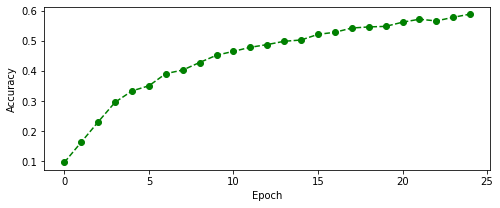

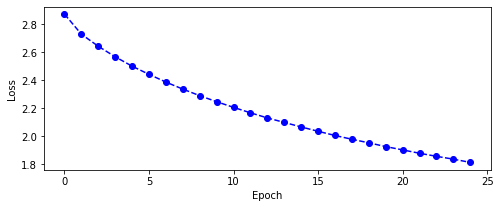

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# 01 - Save model as h5
model.save("/content/simpan_model/model_resnet.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/simpan_model/model_resnet.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

In [ ]:
# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model('/content/simpan_model/model_resnet.h5') 
#model.summary()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)


# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1)
'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Label Prediksi   : [ 0  0  0 ... 19 19 19]
Label Sebenarya  : [ 0  0  0 ... 19 19 19] 

37/37 [==============================] - 3s 83ms/step - loss: 1.8496 - accuracy: 0.6544


Accuracy : 65.444%
Loss     : 1.850

Classification Report :

              precision    recall  f1-score   support

          Ka       0.68      0.75      0.71        61
          Ga       0.65      0.80      0.72        61
         Nga       1.00      0.41      0.58        61
          Pa       0.75      0.79      0.77        61
          Ba       0.75      0.77      0.76        61
          Ma       0.29      0.92      0.44        61
          Ta       0.69      0.58      0.63        69
          Da       0.61      0.98      0.75        61
          Na       0.81      0.49      0.61        61
          Ca       0.98      0.70      0.82        61
          Ja       0.60      0.52      0.56        61
         Nya       0.79      0.54      0.64        61
          Ya       0.92      0.59      0.72        61
           A       0.65      0.72      0.68        67
          La       0.75      0.39      0.52        61
          Ra       1.00      0.58      0.74        43
          Sa       

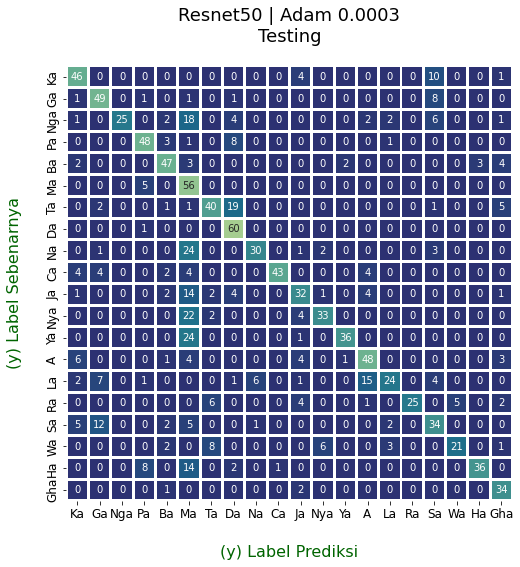

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['Ka', 'Ga', 'Nga', 'Pa', 'Ba', 'Ma', 'Ta', 'Da', 'Na', 'Ca', 'Ja', 'Nya','Ya', 'A', 'La', 'Ra', 'Sa', 'Wa', 'Ha', 'Gha']  
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Resnet50 | Adam 0.0003\nTesting', fontsize=18, pad=24)  
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()